<a href="https://colab.research.google.com/github/parsafeyz/Classification_Logistic_regression/blob/main/LL_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score([0,1,0,0,1,1,1], [0,1,0,1,1,1,0],pos_label=1)

np.float64(0.6)

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
%matplotlib inline

In [ ]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2025-07-18 10:40:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.03s   

2025-07-18 10:40:51 (1.09 MB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [ ]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

/tmp/ipython-input-15-671479859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [ ]:
churn_df.shape

(200, 10)

In [ ]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
print(yhat)
print(y_test)

out = []
for i in yhat:
  if i == y_test[i]:
    out.append(True)
  else:
    out.append(False)

print(out)
print((out.count(True)) / len(out))

[0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 0]
[0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1
 0 1 0]
[True, False, True, True, True, True, True, False, False, True, True, True, True, True, False, True, False, True, True, False, True, False, True, True, True, True, True, True, True, False, False, False, True, False, True, True, True, True, False, True]
0.7


In [ ]:
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)

avg = []
for i in range(len(out)):
  if not(out[i]):
    avg.append(yhat_prob[i])
print(avg)

[[0.57009942 0.42990058]
 [0.46012806 0.53987194]
 [0.63493197 0.36506803]
 [0.6426771  0.3573229 ]
 [0.70369645 0.29630355]
 [0.5316546  0.4683454 ]
 [0.67874529 0.32125471]
 [0.37763626 0.62236374]
 [0.44306057 0.55693943]
 [0.73180582 0.26819418]
 [0.66779687 0.33220313]
 [0.57036545 0.42963455]
 [0.6359445  0.3640555 ]
 [0.64052949 0.35947051]
 [0.45168688 0.54831312]
 [0.53729725 0.46270275]
 [0.48174671 0.51825329]
 [0.51964789 0.48035211]
 [0.53201241 0.46798759]
 [0.49456326 0.50543674]
 [0.52442181 0.47557819]
 [0.44792737 0.55207263]
 [0.53285644 0.46714356]
 [0.50368874 0.49631126]
 [0.54951193 0.45048807]
 [0.52303195 0.47696805]
 [0.71123507 0.28876493]
 [0.59272583 0.40727417]
 [0.75603608 0.24396392]
 [0.45018938 0.54981062]
 [0.4920462  0.5079538 ]
 [0.45591063 0.54408937]
 [0.65904462 0.34095538]
 [0.41193388 0.58806612]
 [0.69245214 0.30754786]
 [0.51622447 0.48377553]
 [0.54969383 0.45030617]
 [0.67145236 0.32854764]
 [0.48516807 0.51483193]
 [0.61090366 0.38909634]]

In [ ]:
jaccard_score(y_test, yhat,pos_label=0)

np.float64(0.696969696969697)

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 7  5]
 [ 5 23]]


Confusion matrix, without normalization
[[ 7  5]
 [ 5 23]]


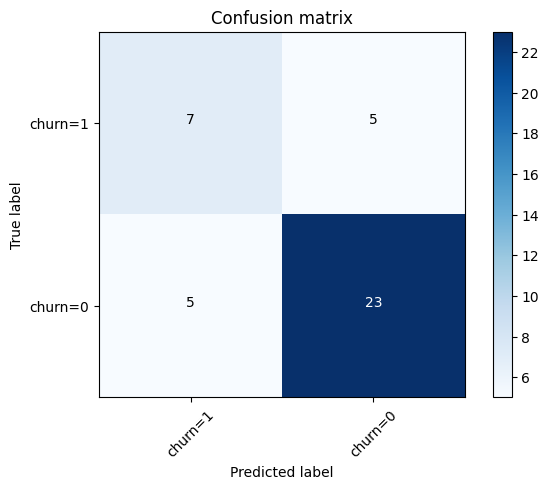

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.58      0.58      0.58        12

    accuracy                           0.75        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.75      0.75      0.75        40



In [ ]:
log_loss(y_test, yhat_prob)

0.5709147162580647